In [1]:
import pylab as plt
import numpy as np
import pandas as pd
'''import proposal as pp  #installed with pip
import scipy
from scipy import interpolate
from scipy.interpolate import griddata
from MCEq.core import config, MCEqRun
import crflux.models as crf
# matplotlib used plotting. Not required to run the code.'''
import matplotlib.pyplot as plt
#import tables as tb
#import csv

In [2]:
#to read file
pdmtn=pd.read_hdf('./MountainProfile.h5')

In [3]:
#putting coordinates in format for contour plot
Ymax=int(np.round(pdmtn['Y'].max(),0))
Xmax=int(np.round(pdmtn['X'].max(),0))
Ymin=int(np.round(pdmtn['Y'].min(),0))
Xmin=int(np.round(pdmtn['X'].min(),0))

StepSize=100

vals=[]
X1= range(Xmin,Xmax, StepSize)
Y1= range(Ymin,Ymax, StepSize)
for ys in Y1:
    for xs in X1:   
        pts=pdmtn[(pdmtn.X>=xs) &(pdmtn.X<=xs+StepSize)&(pdmtn.Y>=ys) &(pdmtn.Y<=ys+StepSize)].Z.unique()
        ptsz=np.mean(pts)       
        vals.append(ptsz)

vals = np.array(vals)
zz=vals.reshape(len(Y1), len(X1))
[xx,yy]=np.meshgrid(np.arange(Xmin,Xmax,StepSize),np.arange(Ymin,Ymax,StepSize))

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/var/folders/jm/hwfgsj_5419b1s2h09k6lflr6k3jsz/T/ipykernel_88398/1633881322.py:4: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,zz,cmap=cmap)


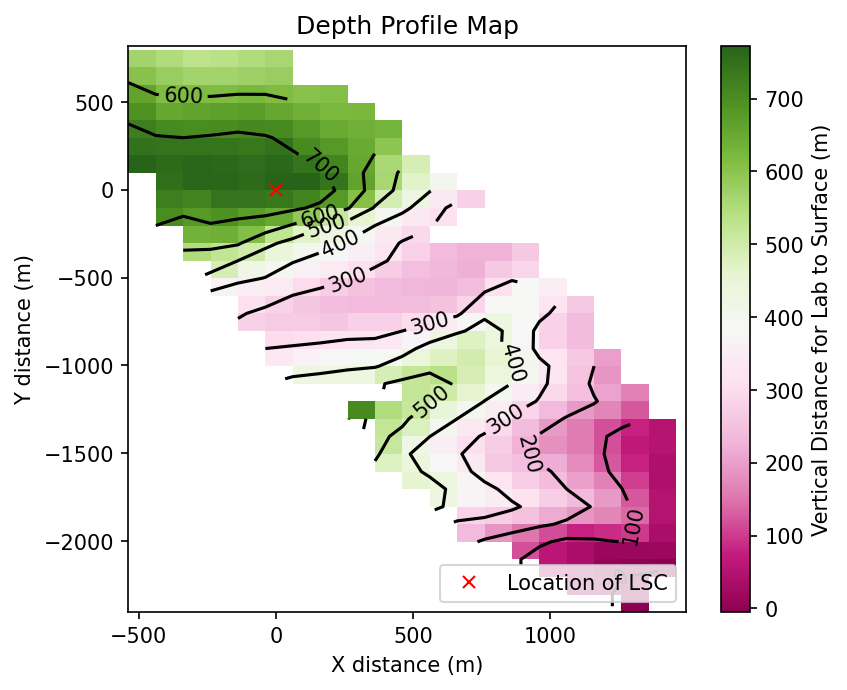

In [4]:
cmap = plt.get_cmap('PiYG')
# Plot the height map
plt.figure(figsize=(6,5),dpi=150)
plt.pcolormesh(xx,yy,zz,cmap=cmap)

plt.colorbar(label='Vertical Distance for Lab to Surface (m)')
CS=plt.contour(xx,yy,zz,colors='black')
plt.clabel(CS, inline=1, fontsize=10,fmt='%1.0f')

plt.ylim(Ymin,Ymax)
plt.xlim(Xmin,Xmax)
plt.xlabel("X distance (m)")
plt.ylabel("Y distance (m)")
plt.title("Depth Profile Map")
plt.plot([0],[0],'x',label='Location of LSC',color='red')
plt.legend(loc='lower right')

In [5]:
#Find the thetas and phis and distance through rock for each grid square
phioffset=0                      # Orientation of detector relative to map - you need to figure this out.
rho=(xx**2+yy**2)**0.5             # cylindrical rho coordinate
theta=np.arctan(rho/zz)           # spherical theta coordinate (0 = downgoing)
phi = np.arctan(yy/xx) + phioffset # spherical phi coordinate
distancetodetector = np.sqrt(zz**2+xx**2+yy**2)

/var/folders/jm/hwfgsj_5419b1s2h09k6lflr6k3jsz/T/ipykernel_88398/2337220942.py:4: RuntimeWarning: divide by zero encountered in true_divide
  theta=np.arctan(rho/zz)           # spherical theta coordinate (0 = downgoing)


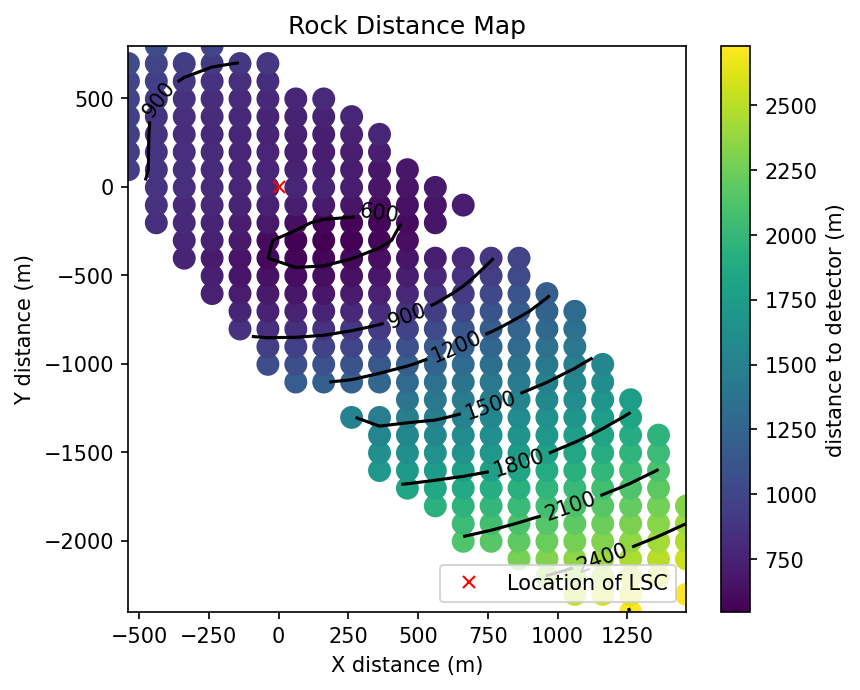

In [6]:
#Plot the distance from the surface to the lab at each place in XY

plt.figure(figsize=(6,5),dpi=150)
plt.scatter(xx,yy,StepSize,distancetodetector)

plt.colorbar(label='distance to detector (m)')
CS=plt.contour(xx,yy,distancetodetector,colors='black')
plt.clabel(CS, inline=1, fontsize=10,fmt='%1.0f')


plt.xlabel("X distance (m)")
plt.ylabel("Y distance (m)")
plt.title("Rock Distance Map")
plt.plot([0],[0],'x',label='Location of LSC',color='red')
plt.legend(loc='lower right')